<a href="https://colab.research.google.com/github/mesaayu/DataScienceDSF/blob/main/dibimbing_dsf_datascience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dsf dibimbing/Pokemon.csv')

In [ ]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
#Strongest Pokemon
strongest_pokemon = df[df['Total'] == df['Total'].max()][['Name', 'Type 1', 'Type 2', 'Total', 'Generation']]
print("The strongest Pokémon based on total statistical value:")
print(strongest_pokemon.to_string(index=False))

The strongest Pokémon based on total statistical value:
                 Name  Type 1   Type 2  Total  Generation
  MewtwoMega Mewtwo X Psychic Fighting    780           1
  MewtwoMega Mewtwo Y Psychic      NaN    780           1
RayquazaMega Rayquaza  Dragon   Flying    780           3


In [ ]:
#Weakest Pokemon
weakest_pokemon = df[df['Total'] == df['Total'].min()][['Name', 'Type 1', 'Type 2', 'Total', 'Generation']]
print("The weakest Pokémon based on total statistical value:")
print(weakest_pokemon.to_string(index=False))

The weakest Pokémon based on total statistical value:
   Name Type 1 Type 2  Total  Generation
Sunkern  Grass    NaN    180           2


In [ ]:
#Grouping Weakest Pokemon by generation
weakest_pokemon_by_generation = df.loc[df.groupby('Generation')['Total'].idxmin()][['Name', 'Type 1', 'Type 2', 'Total', 'Generation']]
print("The weakest Pokémon of each generation:")
print(weakest_pokemon_by_generation.to_string(index=False))

The weakest Pokémon of each generation:
      Name Type 1 Type 2  Total  Generation
  Caterpie    Bug    NaN    195           1
   Sunkern  Grass    NaN    180           2
   Azurill Normal  Fairy    190           3
 Kricketot    Bug    NaN    194           4
    Patrat Normal    NaN    255           5
Scatterbug    Bug    NaN    200           6


In [ ]:
#Grouping Strongest Pokemon by generation
strongest_pokemon_by_generation = df.loc[df.groupby('Generation')['Total'].idxmax()][['Name', 'Type 1', 'Type 2', 'Total', 'Generation']]
print("The strongest Pokémon of each generation:")
print(strongest_pokemon_by_generation.to_string(index=False))

The strongest Pokémon of each generation:
                   Name  Type 1   Type 2  Total  Generation
    MewtwoMega Mewtwo X Psychic Fighting    780           1
TyranitarMega Tyranitar    Rock     Dark    700           2
  RayquazaMega Rayquaza  Dragon   Flying    780           3
                 Arceus  Normal      NaN    720           4
     KyuremBlack Kyurem  Dragon      Ice    700           5
    DiancieMega Diancie    Rock    Fairy    700           6


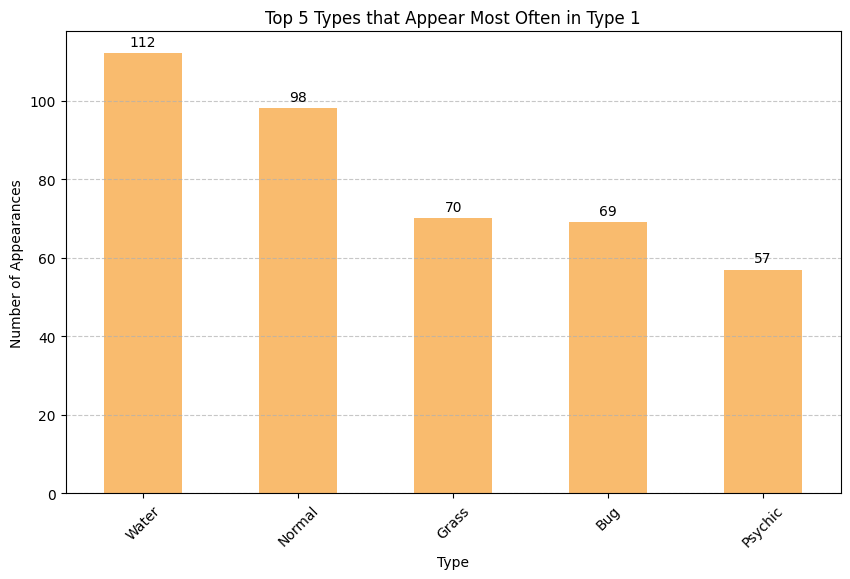

In [ ]:
# frequency of occurrence of each type in column 'Type 1'
type_1_counts = df['Type 1'].value_counts()
top_5_types = type_1_counts.head(5)

plt.figure(figsize=(10, 6))
bars = top_5_types.plot(kind='bar', color='#F9BB6E')
plt.title('Top 5 Types that Appear Most Often in Type 1')
plt.xlabel('Type')
plt.ylabel('Number of Appearances')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center',
                 xytext=(0, 8),
                 textcoords='offset points')

plt.show()

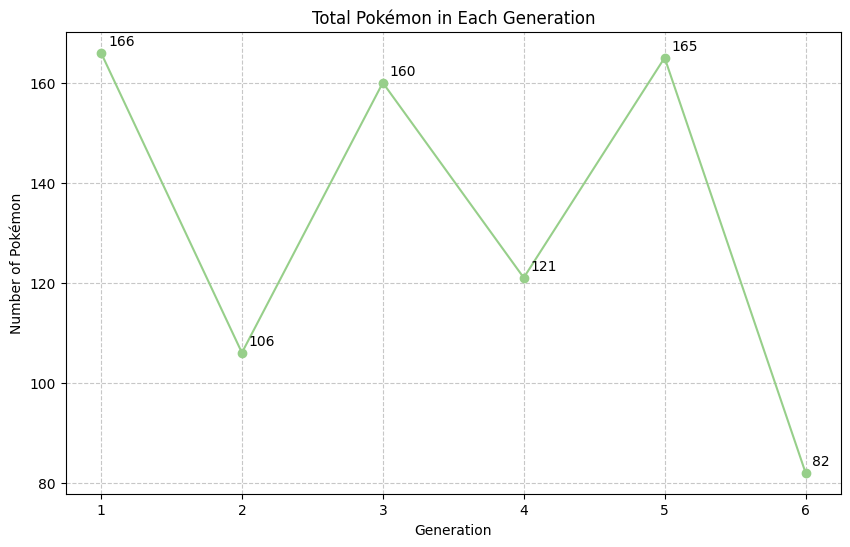

In [ ]:
# total Pokémon in each generation
pokemon_per_generation = df.groupby('Generation').size()

plt.figure(figsize=(10, 6))
pokemon_per_generation.plot(kind='line', marker='o', color='#97CF8A')
plt.title('Total Pokémon in Each Generation')
plt.xlabel('Generation')
plt.ylabel('Number of Pokémon')
plt.xticks(rotation=0)
plt.grid(axis='both', linestyle='--', alpha=0.7)

for generation, count in pokemon_per_generation.items():
    plt.annotate(f'{count}', xy=(generation, count), xytext=(5, 5), textcoords='offset points')

plt.show()

In [ ]:
# Jika kolom 'Legendary' berisi string, konversi ke boolean
if df['Legendary'].dtype == 'object':
    df['Legendary'] = df['Legendary'].str.strip().str.lower() == 'true'

# Menghitung jumlah Pokémon dengan nilai True dan False di kolom 'Legendary'
legendary_counts = df['Legendary'].value_counts()

# Menampilkan jumlah Pokémon Legendary dan non-Legendary
print(f"Total Legendary Pokémon: {legendary_counts.get(True, 0)}")
print(f"Total Non-Legendary Pokémon: {legendary_counts.get(False, 0)}")


Total Legendary Pokémon: 65
Total Non-Legendary Pokémon: 735


Percentage of Legendary Pokémon: 8.12%
Percentage of Non-Legendary Pokémon: 91.88%


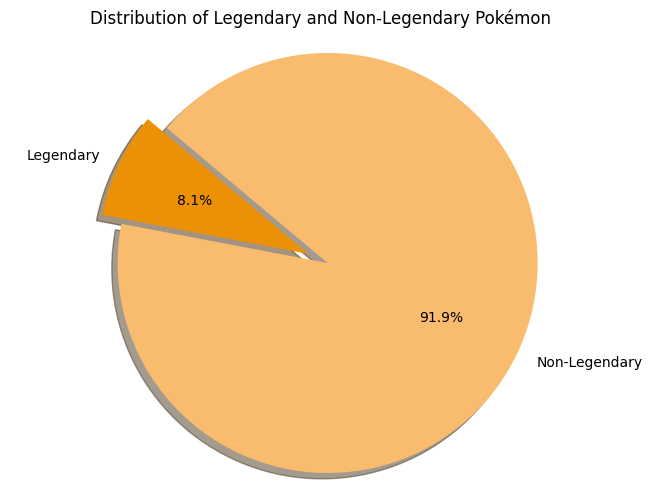

In [ ]:
# comparison between legendary and non-legendary pokemon
legendary_counts = df['Legendary'].value_counts()
total_pokemon = len(df)

percentage_legendary = (legendary_counts.get(True, 0) / total_pokemon) * 100
percentage_non_legendary = (legendary_counts.get(False, 0) / total_pokemon) * 100
print(f"Percentage of Legendary Pokémon: {percentage_legendary:.2f}%")
print(f"Percentage of Non-Legendary Pokémon: {percentage_non_legendary:.2f}%")

labels = ['Legendary', 'Non-Legendary']
sizes = [percentage_legendary, percentage_non_legendary]
colors = ['#EC9006','#F9BB6E']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Legendary and Non-Legendary Pokémon')
plt.axis('equal')
plt.show()

In [ ]:
# Sorting Pokémon by the 'Speed' column
df_sorted = df.sort_values(by='Speed', ascending=False)

# 3 fastest Pokémon
top_3_fastest = df_sorted.head(3)[['Name', 'Speed', 'Type 1']]

# 3 Slowest Pokémon
top_3_slowest = df_sorted.tail(3)[['Name', 'Speed', 'Type 1']]


print("Top 3 Fastest Pokémon:")
print(top_3_fastest.to_string(index=False))
print("\nTop 3 Slowest Pokémon:")
print(top_3_slowest.to_string(index=False))

Top 3 Fastest Pokémon:
              Name  Speed  Type 1
 DeoxysSpeed Forme    180 Psychic
           Ninjask    160     Bug
DeoxysNormal Forme    150 Psychic

Top 3 Slowest Pokémon:
    Name  Speed Type 1
Trapinch     10 Ground
 Shuckle      5    Bug
Munchlax      5 Normal


In [ ]:
# Mencari Pokémon lain yang memiliki kecepatan 150
alternative_pokemon = df[(df['Speed'] == 150) & (df['Name'] != 'DeoxysSpeed Forme')]

# Jika ada Pokémon lain yang memiliki kecepatan 150, ambil salah satu
if not alternative_pokemon.empty:
    alternative_name = alternative_pokemon.iloc[0]['Name']
else:
    # Jika tidak ada Pokémon lain yang memiliki kecepatan 150, ambil Pokémon dengan kecepatan terdekat
    df['Speed_Diff'] = (df['Speed'] - 150).abs()
    alternative_pokemon = df[df['Name'] != 'DeoxysSpeed Forme'].sort_values(by='Speed_Diff').iloc[0]
    alternative_name = alternative_pokemon['Name']

# Mengganti 'DeoxysNormal Forme' dengan nama Pokémon alternatif
df['Name'] = df['Name'].replace('DeoxysNormal Forme', alternative_name)


df_sorted = df.sort_values(by='Speed', ascending=False)
top_3_fastest = df_sorted.head(3)[['Name', 'Speed', 'Type 1']]
top_3_slowest = df_sorted.tail(3)[['Name', 'Speed', 'Type 1']]

print("Top 3 Fastest Pokémon:")
print(top_3_fastest.to_string(index=False))
print("\nTop 3 Slowest Pokémon:")
print(top_3_slowest.to_string(index=False))

Top 3 Fastest Pokémon:
                 Name  Speed  Type 1
    DeoxysSpeed Forme    180 Psychic
              Ninjask    160     Bug
AlakazamMega Alakazam    150 Psychic

Top 3 Slowest Pokémon:
    Name  Speed Type 1
Trapinch     10 Ground
 Shuckle      5    Bug
Munchlax      5 Normal


In [ ]:
# Pokémon with the Highest Defense in Every Generation
defense_max_per_generation = df.loc[df.groupby('Generation')['Defense'].idxmax()][['Generation', 'Name', 'Defense']]
print("Pokémon with the Highest Defense in Every Generation:")
print(defense_max_per_generation.to_string(index=False))

Pokémon with the Highest Defense in Every Generation:
 Generation                Name  Defense
          1 SlowbroMega Slowbro      180
          2 SteelixMega Steelix      230
          3   AggronMega Aggron      230
          4           Bastiodon      168
          5          Cofagrigus      145
          6             Avalugg      184


Percentage of Pokémon with one type: 48.25%
Percentage of Pokémon with two types: 51.75%


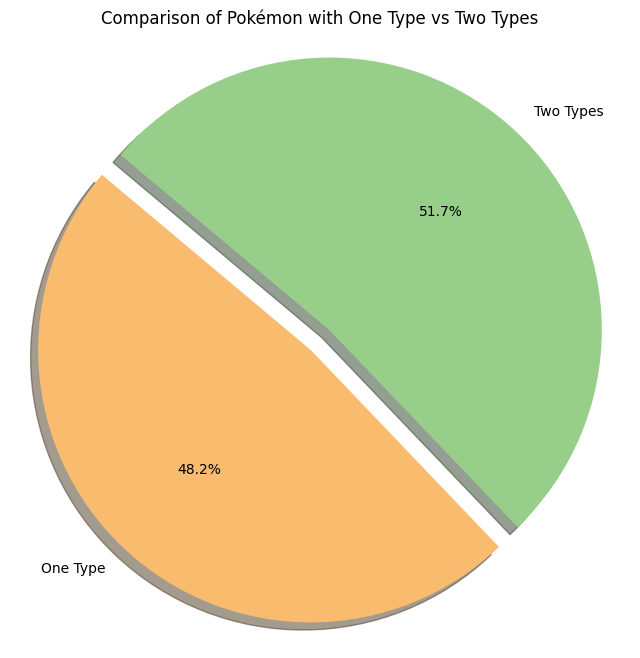

In [ ]:
# Counting the number of one-type and two-type Pokémon
one_type_count = df['Type 2'].isna().sum()
two_type_count = df['Type 2'].notna().sum()
total_pokemon = len(df)

one_type_percentage = (one_type_count / total_pokemon) * 100
two_type_percentage = (two_type_count / total_pokemon) * 100
print(f"Percentage of Pokémon with one type: {one_type_percentage:.2f}%")
print(f"Percentage of Pokémon with two types: {two_type_percentage:.2f}%")

labels = ['One Type', 'Two Types']
sizes = [one_type_percentage, two_type_percentage]
colors = ['#F9BB6E', '#97CF8A']
explode = (0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Comparison of Pokémon with One Type vs Two Types')
plt.axis('equal')
plt.show()